In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import os

In [3]:
chile_df = pd.read_csv('data_clean/chile_clean.csv')
argentina_df = pd.read_csv('data_clean/argentina_clean.csv')
antartica_df = pd.read_csv('data_clean/antartica_clean.csv')

Creamos una funcion para hacer una columna con la informacion de la region donde se ubicaba segun la latitud y longitud.

In [ ]:
import zipfile

# Extraemos provincia.zip y Regiones.zip que están en la carpeta data
with zipfile.ZipFile('data/provincia.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

with zipfile.ZipFile('data/Regiones.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')


: 

In [4]:
from shapely.geometry import Point

# Definir la función para asignar regiones
def asignar_regiones(df, lat_col, lng_col, shapefile_path):
    # Cargar el shapefile que contiene las regiones
    regiones = gpd.read_file(shapefile_path).to_crs(4326)

    # Convertir el DataFrame en un GeoDataFrame
    df['geometry'] = df.apply(lambda row: Point(row[lng_col], row[lat_col]), axis=1)
    geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

    # Realizar la unión espacial
    resultado = gpd.sjoin(geo_df, regiones, how='left', predicate='intersects')

    # Eliminar la columna 'geometry' si no la necesitas
    resultado = resultado.drop(columns='geometry')

    # Retornar el DataFrame con la nueva columna de región
    return resultado

# Obtener el directorio de trabajo actual
base_dir = os.getcwd()

# Definir la ruta relativa al shapefile
shapefile_path = os.path.join(base_dir, 'data', 'Regiones', 'Regional.shp')

# Asignar regiones
resultado = asignar_regiones(chile_df, 'lat', 'lng', shapefile_path)

# Actualizar la columna 'region' en chile_df
chile_df['region'] = resultado['Region']  # Asegúrate de que 'Region' es el nombre correcto

# Mostrar el DataFrame actualizado
print(chile_df[['species_name', 'lat', 'lng', 'region']])
chile_df = chile_df.drop(columns='geometry', errors='ignore')

     species_name        lat        lng  \
0       ceciliana -37.000000 -73.000000   
1      amuriensis -37.000000 -73.000000   
2     cuneiformis -37.000000 -73.000000   
3     levitestata -37.000000 -73.000000   
4         pencana -37.000000 -73.000000   
...           ...        ...        ...   
9476          sp. -50.884998 -72.625000   
9477   antarctica -50.884998 -72.625000   
9478          sp. -50.884998 -72.625000   
9479   saladensis -27.684723 -70.949997   
9480       indet. -50.711666 -72.541389   

                                        region  
0                           Región del Bío-Bío  
1                           Región del Bío-Bío  
2                           Región del Bío-Bío  
3                           Región del Bío-Bío  
4                           Región del Bío-Bío  
...                                        ...  
9476  Región de Magallanes y Antártica Chilena  
9477  Región de Magallanes y Antártica Chilena  
9478  Región de Magallanes y Antártica Chi

In [5]:
chile_df

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late,region
0,ceciliana,16417,Leionucula,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula,Cretaceous,No especificado,Región del Bío-Bío
1,amuriensis,16418,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado,Región del Bío-Bío
2,cuneiformis,16419,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado,Región del Bío-Bío
3,levitestata,16420,Yoldia,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.000000,-73.000000,deposit feeder,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia,Cretaceous,No especificado,Región del Bío-Bío
4,pencana,16421,Neiloides,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.000000,-73.000000,deposit feeder,infaunal,NaN,NaN,Neiloides,Cretaceous,No especificado,Región del Bío-Bío
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,sp.,1659402,Ostrea,Mollusca,Bivalvia,Ostreida,Ostreidae,Ostrea,-50.884998,-72.625000,suspension feeder,epifaunal,basinal (siliciclastic),"hypersaline,marine,brackish",Ostrea,Cretaceous,Cretaceous,Región de Magallanes y Antártica Chilena
9477,antarctica,1659403,Cucullaea antarctica,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-50.884998,-72.625000,suspension feeder,infaunal,basinal (siliciclastic),NaN,Cucullaea,Cretaceous,Cretaceous,Región de Magallanes y Antártica Chilena
9478,sp.,1659404,Nucula,Mollusca,Bivalvia,Nuculida,Nuculidae,Nucula,-50.884998,-72.625000,"deposit feeder, suspension feeder",infaunal,basinal (siliciclastic),"coastal,inner shelf,outer shelf,oceanic",Nucula,Cretaceous,Cretaceous,Región de Magallanes y Antártica Chilena
9479,saladensis,1660104,Micrauchenia saladensis,Chordata,Mammalia,Panameriungulata,Macraucheniidae,Micrauchenia,-27.684723,-70.949997,herbivore,scansorial,coastal indet.,terrestrial,Micrauchenia,Neogene,Neogene,Región de Atacama


Ahora veremos cuantos fosiles hay en chile y como estan distribuidos por todo el pais separandolo por region.

                                       region  total_ocurrencias
0                Región de Arica y Parinacota               50.0
1                          Región de Tarapacá              125.0
2                       Región de Antofagasta              912.0
3    Región de Magallanes y Antártica Chilena              583.0
4   Región de Aysén del Gral.Ibañez del Campo              514.0
5                           Región de Atacama             4732.0
6                          Región de Coquimbo              740.0
7                        Región de Valparaíso               60.0
8            Región Metropolitana de Santiago              460.0
9                         Región de Los Lagos              176.0
10                         Región de Los Ríos               12.0
11                     Región de La Araucanía               20.0
12                         Región del Bío-Bío              290.0
13                            Región de Ñuble               34.0
14                       

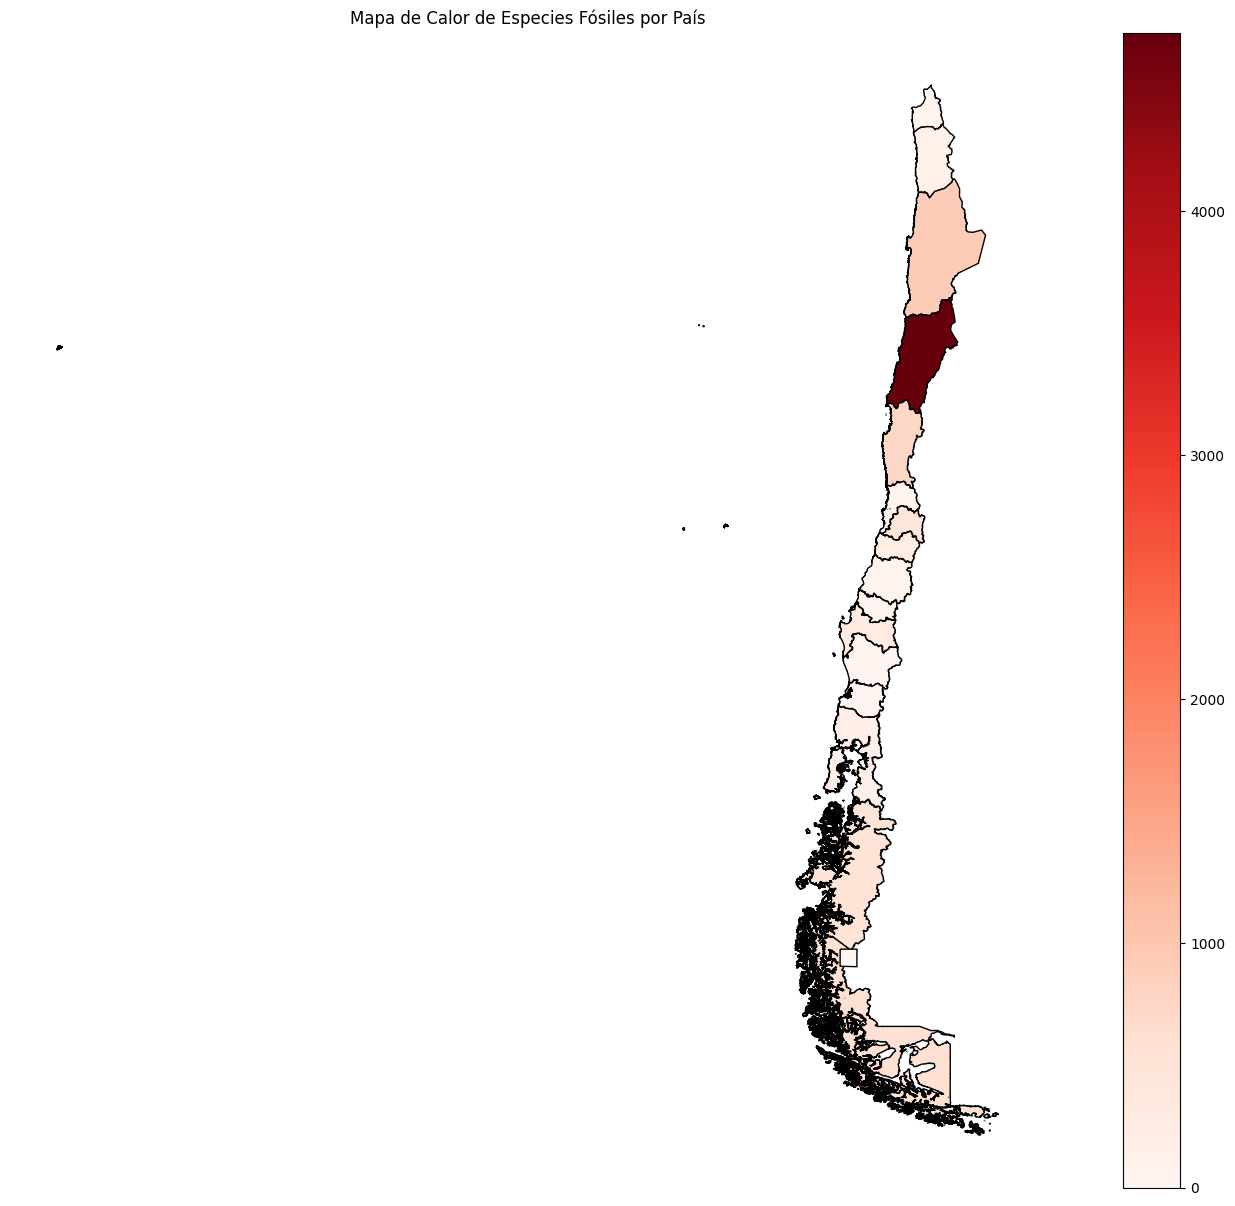

In [6]:

paises = gpd.read_file(shapefile_path).to_crs(4326)
df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby('region').agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

paises = paises.rename(columns={'Region': 'region'})

paises['region'] = paises['region'].astype(str)
distribucion['region'] = distribucion['region'].astype(str)

merged = paises.merge(distribucion, on='region', how='left')
merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

print(merged[['region', 'total_ocurrencias']])

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.plot(column='total_ocurrencias', ax=ax, legend=True,
            cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
            edgecolor='black')

ax.set_title('Mapa de Calor de Especies Fósiles por País')
ax.set_axis_off()  

plt.show()

Se puede ver en el anterior mapa que el mapa de calor y la mayor cantidad de fosiles estan en la region de atacama. 

Como lo hicimos en Chile con las regiones lo haremos con el simil de argentina el cual son las provincias.

In [7]:
def asignar_provincias(df, lat_col, lng_col, shapefile_path):
    provincias = gpd.read_file(shapefile_path).to_crs(4326)
    print(provincias.columns)
    
    df['geometry'] = df.apply(lambda row: Point(row[lng_col], row[lat_col]), axis=1)
    geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

    resultados_arg = gpd.sjoin(geo_df, provincias, how='left', predicate='intersects')
    resultados_arg = resultados_arg.drop(columns='geometry')

    return resultados_arg


base_dir = os.getcwd()
shapefile_path_pro = os.path.join(base_dir, 'data', 'provincia', 'provincia.shp')


resultados_arg = asignar_provincias(argentina_df, 'lat', 'lng', shapefile_path_pro)
print(resultados_arg.columns)

argentina_df['region'] = resultados_arg['nam'] 

print(argentina_df[['species_name', 'lat', 'lng', 'region']])
argentina_df = argentina_df.drop(columns='geometry', errors='ignore')

Index(['gid', 'entidad', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag', 'geometry'], dtype='object')
Index(['species_name', 'occurrence_no', 'accepted_name', 'phylum', 'class',
       'order', 'family', 'genus', 'lat', 'lng', 'diet', 'life_habit',
       'environment', 'taxon_environment', 'primary_name', 'era_early',
       'era_late', 'index_right', 'gid', 'entidad', 'fna', 'gna', 'nam', 'in1',
       'fdc', 'sag'],
      dtype='object')
          species_name        lat        lng   region
0                  sp. -39.000000 -69.000000  Neuquén
1               rocana -39.000000 -69.000000  Neuquén
2           feruglioli -39.000000 -69.000000  Neuquén
3                  sp. -39.000000 -69.000000  Neuquén
4      mechanquilensis -39.000000 -69.000000  Neuquén
...                ...        ...        ...      ...
31876         cretacea -38.099998 -68.383331  Neuquén
31877     macrocephala -38.099998 -68.383331  Neuquén
31878        excellens -38.099998 -68.383331  Neuquén
31879          venust

In [8]:
argentina_df

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late,region
0,sp.,17744,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-39.000000,-69.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado,Neuquén
1,rocana,17745,Cucullaea,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-39.000000,-69.000000,suspension feeder,infaunal,NaN,NaN,Cucullaea,Cretaceous,No especificado,Neuquén
2,feruglioli,17746,Glycymerita,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.000000,-69.000000,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado,Neuquén
3,sp.,17747,Glycymerita,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.000000,-69.000000,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado,Neuquén
4,mechanquilensis,17748,Inoceramus,Mollusca,Bivalvia,Myalinida,Inoceramidae,Inoceramus,-39.000000,-69.000000,suspension feeder,epifaunal,NaN,NaN,Inoceramus,Cretaceous,No especificado,Neuquén
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31876,cretacea,1664301,Guembelitria cretacea,Foraminifera,NO_CLASS_SPECIFIED,Foraminifera,Guembelitriidae,Guembelitria,-38.099998,-68.383331,omnivore,semi-infaunal,marine indet.,NaN,Guembelitria,Cretaceous,No especificado,Neuquén
31877,macrocephala,1664302,Rugoglobigerina macrocephala,Foraminifera,NO_CLASS_SPECIFIED,Foraminifera,Globotruncanidae,Rugoglobigerina,-38.099998,-68.383331,omnivore,semi-infaunal,marine indet.,NaN,Rugoglobigerina,Cretaceous,No especificado,Neuquén
31878,excellens,1664303,Cythereis excellens,Arthropoda,Ostracoda,Podocopida,Trachyleberididae,Cythereis,-38.099998,-68.383331,"detritivore, grazer",epifaunal,marine indet.,"hypersaline,marine,brackish,freshwater",Cythereis,Cretaceous,No especificado,Neuquén
31879,venusta,1664304,Petalocythereis venusta,Arthropoda,Ostracoda,Podocopida,Trachyleberididae,Petalocythereis,-38.099998,-68.383331,"detritivore, grazer",epifaunal,marine indet.,"hypersaline,marine,brackish,freshwater",Anticythereis,Cretaceous,No especificado,Neuquén


Columnas en el shapefile de provincias: Index(['gid', 'entidad', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag', 'geometry'], dtype='object')
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires               12.0
1                                             Neuquén             4200.0
2                                            San Luis              159.0
3                                            Santa Fe              335.0
4                                            La Rioja              702.0
5                                           Catamarca              520.0
6                                             Tucumán               95.0
7                                               Chaco               32.0
8                                             Formosa                9.0
9                                          Santa Cruz             5118.0
10                                             Chubut        

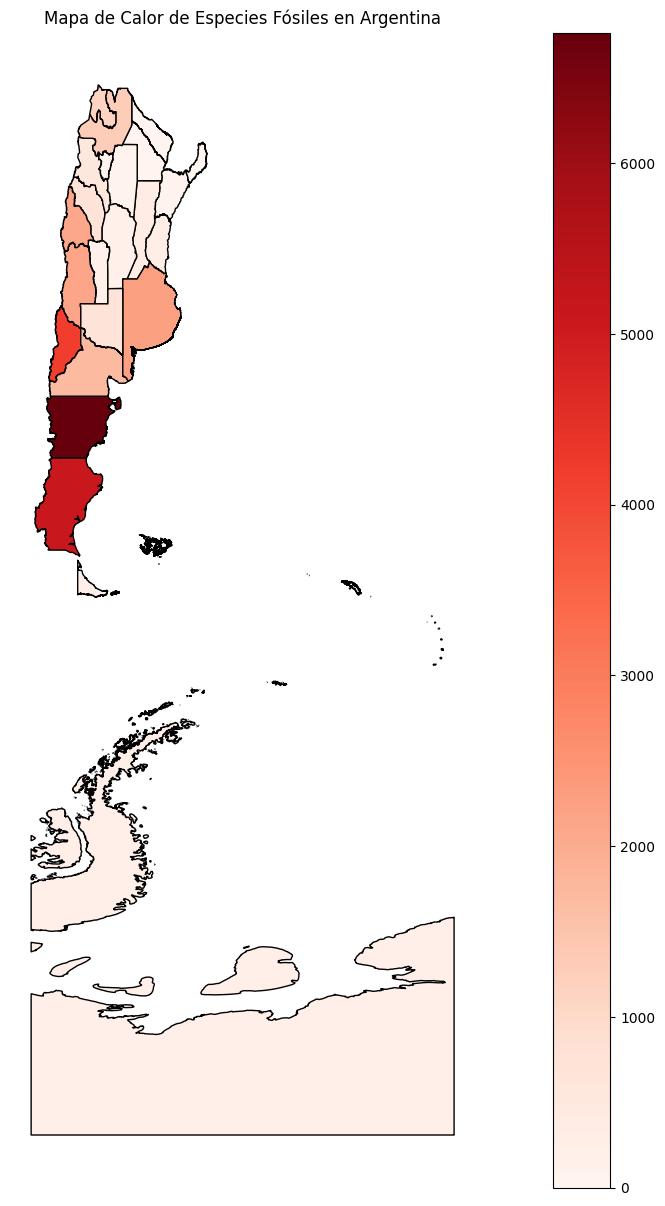

In [9]:

provincias = gpd.read_file(shapefile_path_pro).to_crs(4326)

print("Columnas en el shapefile de provincias:", provincias.columns)

df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby('region').agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

provincias['nam'] = provincias['nam'].astype(str)  
distribucion['region'] = distribucion['region'].astype(str)  

merged = provincias.merge(distribucion, left_on='nam', right_on='region', how='left')
merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

print(merged[['nam', 'total_ocurrencias']])

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.plot(column='total_ocurrencias', ax=ax, legend=True,
            cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
            edgecolor='black')

ax.set_title('Mapa de Calor de Especies Fósiles en Argentina')
ax.set_axis_off()  

plt.show()

En el anterior mapa podemos ver que en la provincia de Chubut es en la cual esta la mayoria de los fosiles del territorio argentino.

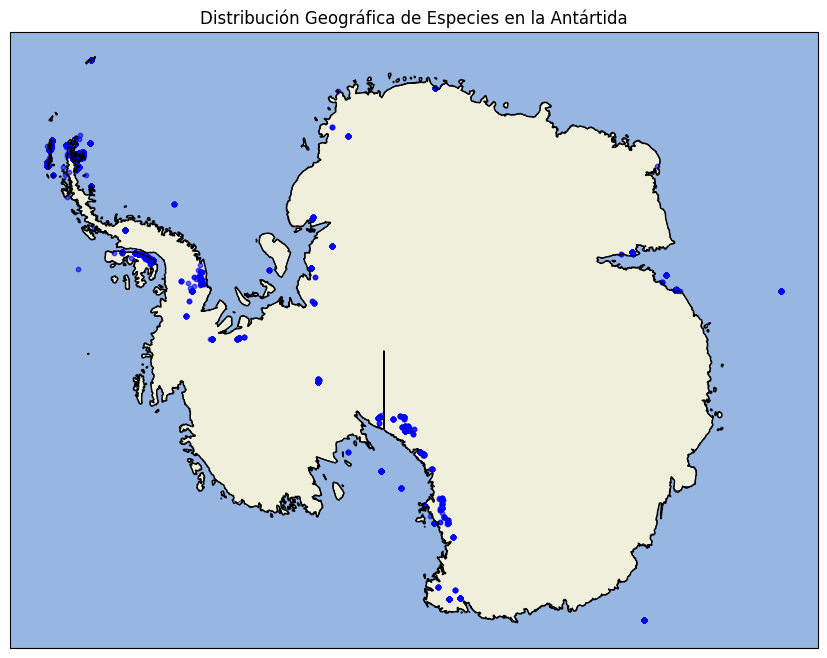

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

ax.scatter(antartica_df['lng'], antartica_df['lat'], color='blue', alpha=0.6, s=10,
           transform=ccrs.PlateCarree())

plt.title('Distribución Geográfica de Especies en la Antártida')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Y en este mapa de la antartica se puede ver que justamente en la parte perteneciente a Chile y Argentina es en la cual se ubican la mayoria de hallasgos fosiles

Definiremos las top 5 eras en Chile,Argentina y la Antartica para analizar la pregunta

In [11]:
top_eras_chile = chile_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

# Renombrar la columna para mayor claridad
top_eras_chile.rename(columns={'species_name': 'total_fossils'}, inplace=True)

# Ordenar de mayor a menor y obtener las 5 principales
top_5_eras_chile = top_eras_chile.sort_values(by='total_fossils', ascending=False).head(5)

# Mostrar el resultado
print(top_5_eras_chile)

     era_early  total_fossils
3     Jurassic           5037
4      Neogene           1869
1   Cretaceous           1367
10  Quaternary            610
11    Triassic            254


In [12]:
# Agrupar por era y contar la cantidad de fósiles
top_eras_argentina = argentina_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

# Renombrar la columna para mayor claridad
top_eras_argentina.rename(columns={'species_name': 'total_fossils'}, inplace=True)

# Ordenar de mayor a menor y obtener las 5 principales
top_5_eras_argentina = top_eras_argentina.sort_values(by='total_fossils', ascending=False).head(5)

# Mostrar el resultado
print(top_5_eras_argentina)

    era_early  total_fossils
7   Paleogene           8020
2  Cretaceous           7080
5     Neogene           6740
6  Ordovician           3357
4    Jurassic           2416


In [13]:
top_eras_antartica = antartica_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

# Renombrar la columna para mayor claridad
top_eras_antartica.rename(columns={'species_name': 'total_fossils'}, inplace=True)

# Ordenar de mayor a menor y obtener las 5 principales
top_5_eras_antartica = top_eras_antartica.sort_values(by='total_fossils', ascending=False).head(5)

# Mostrar el resultado
print(top_5_eras_antartica)

    era_early  total_fossils
2  Cretaceous           4861
7   Paleogene           3405
4    Jurassic           1794
0    Cambrian            301
9  Quaternary            277


Ahora lo que haremos es mostrar los 5 mapas de cada uno de los top en chile para ver los posibles cambios en la biodiversidad segun la era.

Datos combinados para la era Jurassic:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota               22.0
1                          Región de Tarapacá              107.0
2                       Región de Antofagasta              655.0
3    Región de Magallanes y Antártica Chilena               17.0
4   Región de Aysén del Gral.Ibañez del Campo                9.0
5                           Región de Atacama             3538.0
6                          Región de Coquimbo              184.0
7                        Región de Valparaíso               16.0
8            Región Metropolitana de Santiago              410.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío                0.0
13                            Región de Ñuble      

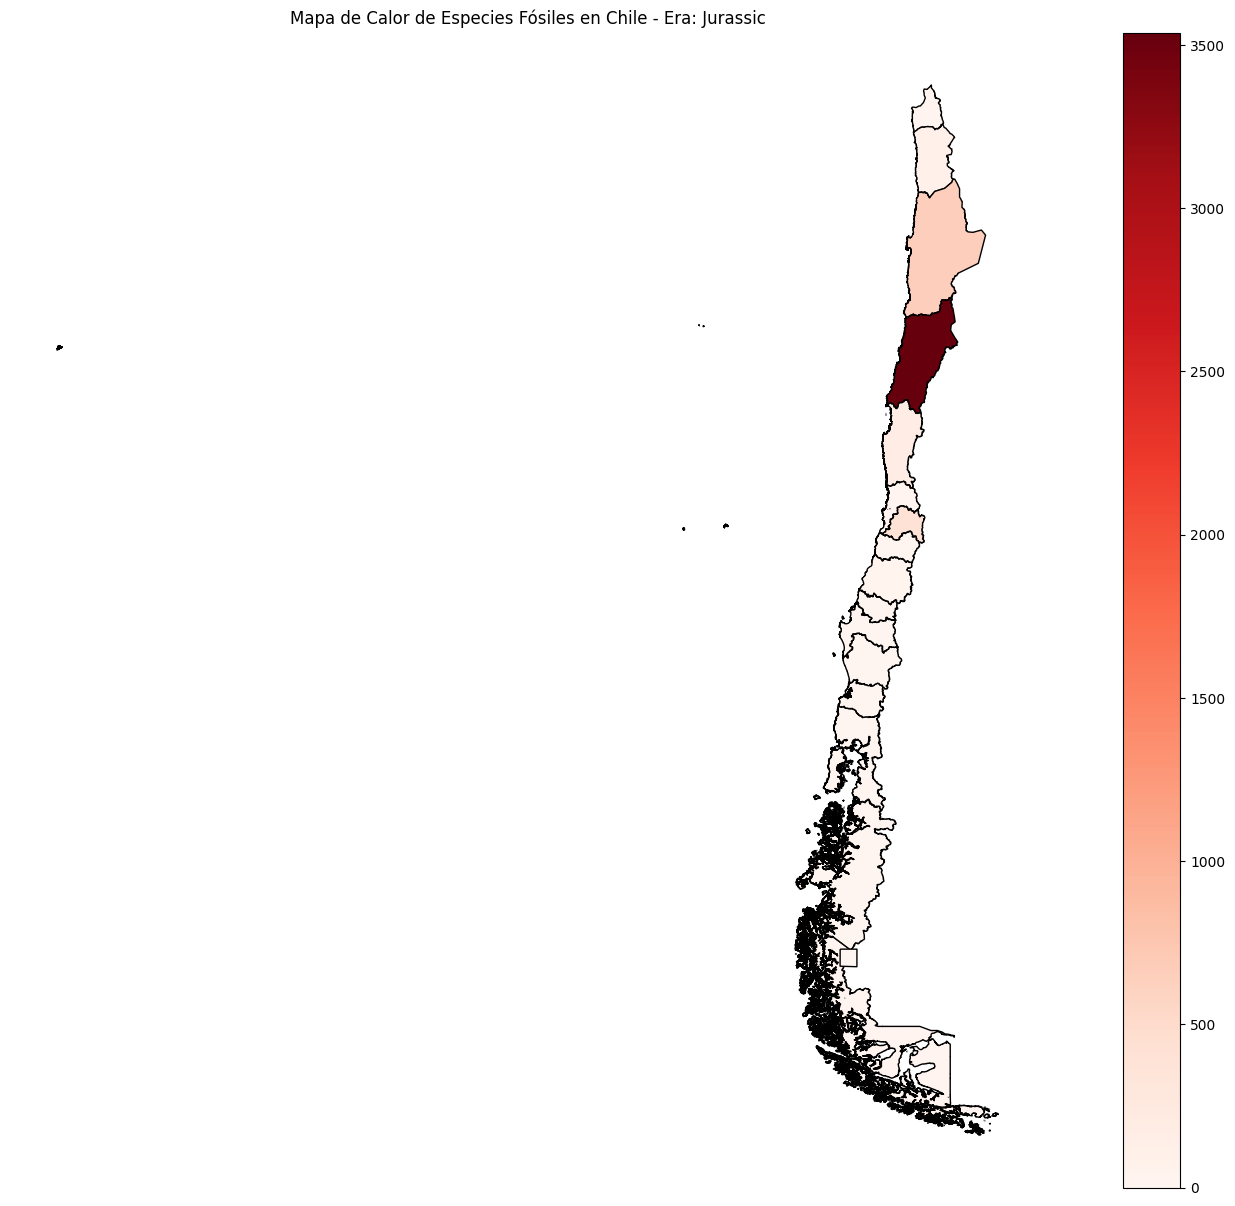

Datos combinados para la era Neogene:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota               25.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta               77.0
3    Región de Magallanes y Antártica Chilena               36.0
4   Región de Aysén del Gral.Ibañez del Campo              487.0
5                           Región de Atacama              333.0
6                          Región de Coquimbo              223.0
7                        Región de Valparaíso               23.0
8            Región Metropolitana de Santiago                6.0
9                         Región de Los Lagos              163.0
10                         Región de Los Ríos                2.0
11                     Región de La Araucanía               11.0
12                         Región del Bío-Bío              108.0
13                            Región de Ñuble       

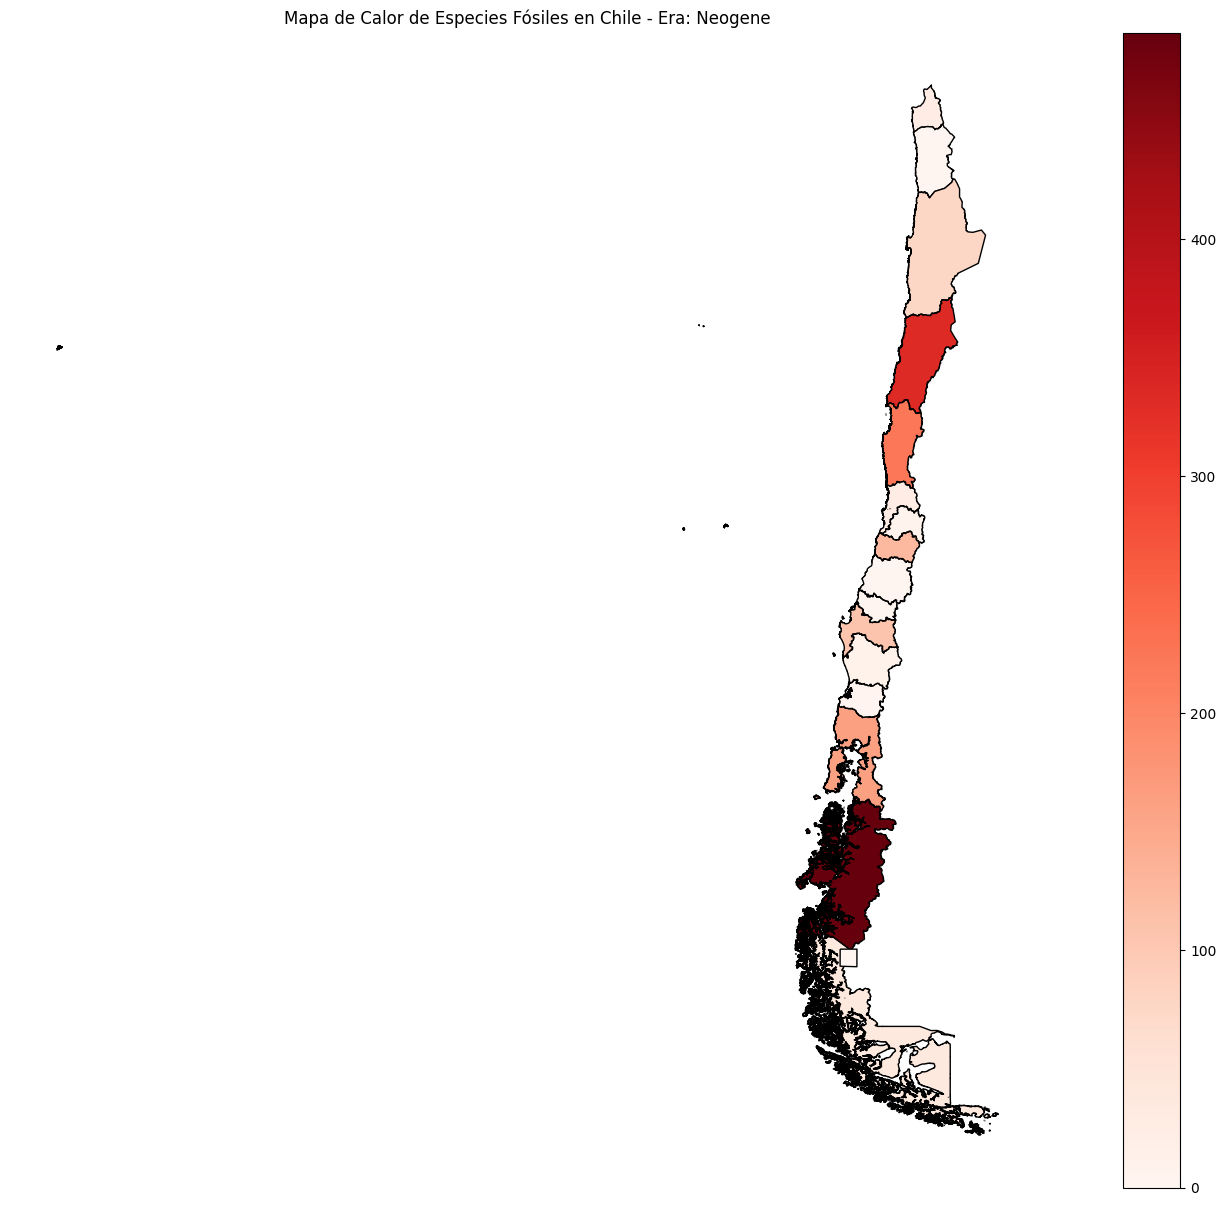

Datos combinados para la era Cretaceous:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                1.0
1                          Región de Tarapacá                7.0
2                       Región de Antofagasta               19.0
3    Región de Magallanes y Antártica Chilena              401.0
4   Región de Aysén del Gral.Ibañez del Campo                0.0
5                           Región de Atacama              433.0
6                          Región de Coquimbo              246.0
7                        Región de Valparaíso                7.0
8            Región Metropolitana de Santiago               31.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío              102.0
13                            Región de Ñuble    

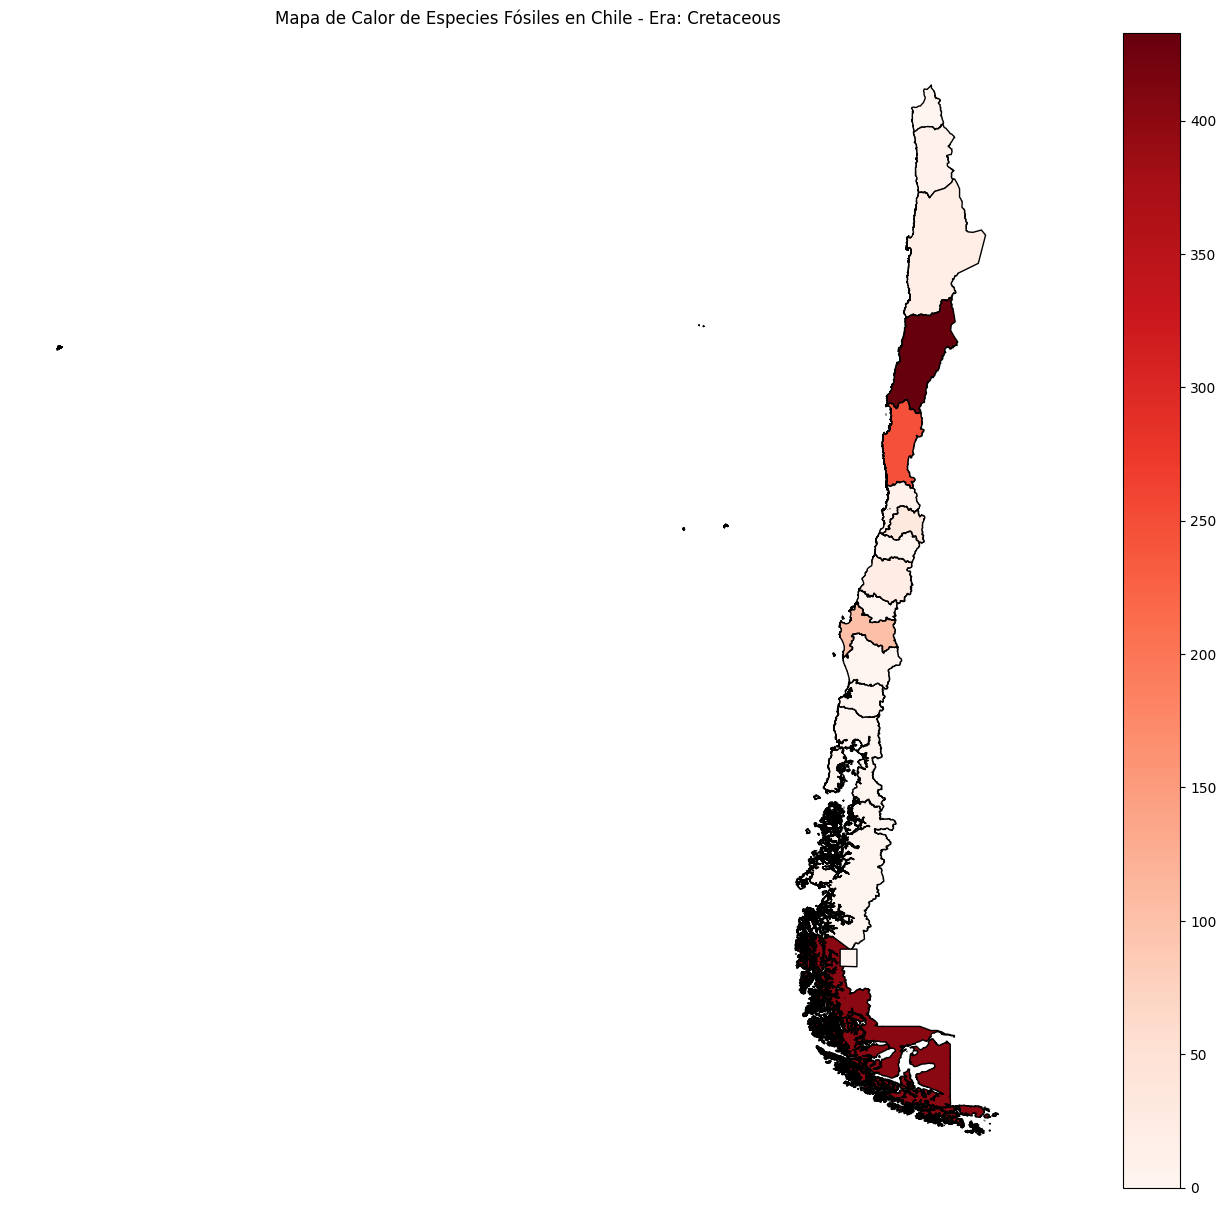

Datos combinados para la era Quaternary:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                2.0
1                          Región de Tarapacá                4.0
2                       Región de Antofagasta               13.0
3    Región de Magallanes y Antártica Chilena               57.0
4   Región de Aysén del Gral.Ibañez del Campo               17.0
5                           Región de Atacama              251.0
6                          Región de Coquimbo               59.0
7                        Región de Valparaíso               10.0
8            Región Metropolitana de Santiago               13.0
9                         Región de Los Lagos               12.0
10                         Región de Los Ríos                5.0
11                     Región de La Araucanía                9.0
12                         Región del Bío-Bío               32.0
13                            Región de Ñuble    

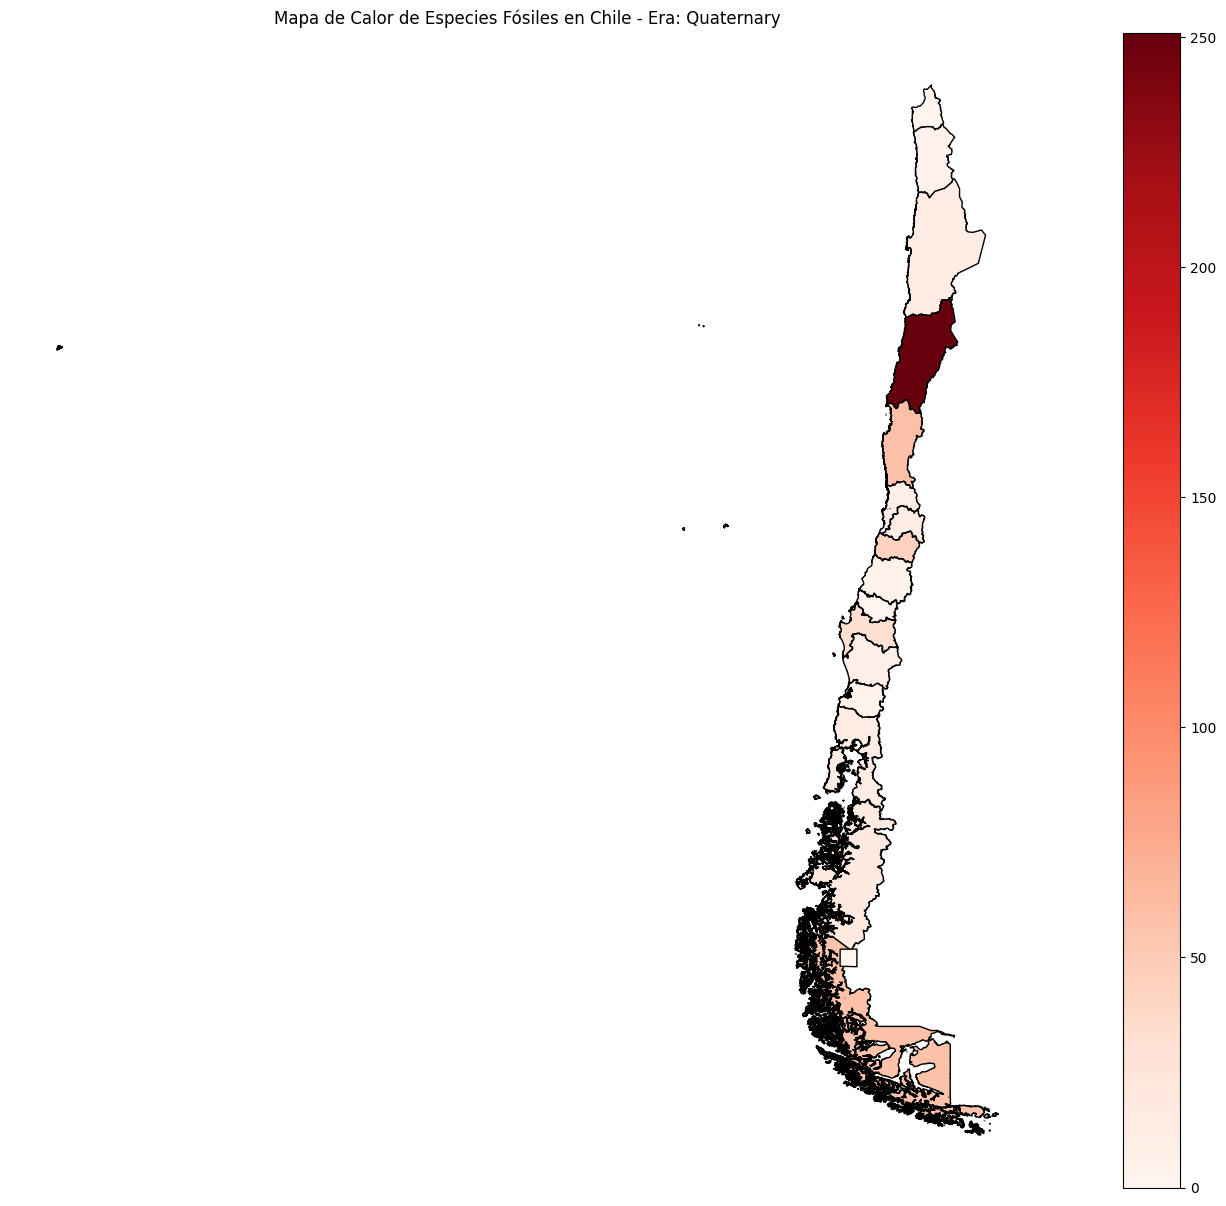

Datos combinados para la era Triassic:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                0.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta               53.0
3    Región de Magallanes y Antártica Chilena                0.0
4   Región de Aysén del Gral.Ibañez del Campo                1.0
5                           Región de Atacama              135.0
6                          Región de Coquimbo                0.0
7                        Región de Valparaíso                4.0
8            Región Metropolitana de Santiago                0.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                5.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío               43.0
13                            Región de Ñuble      

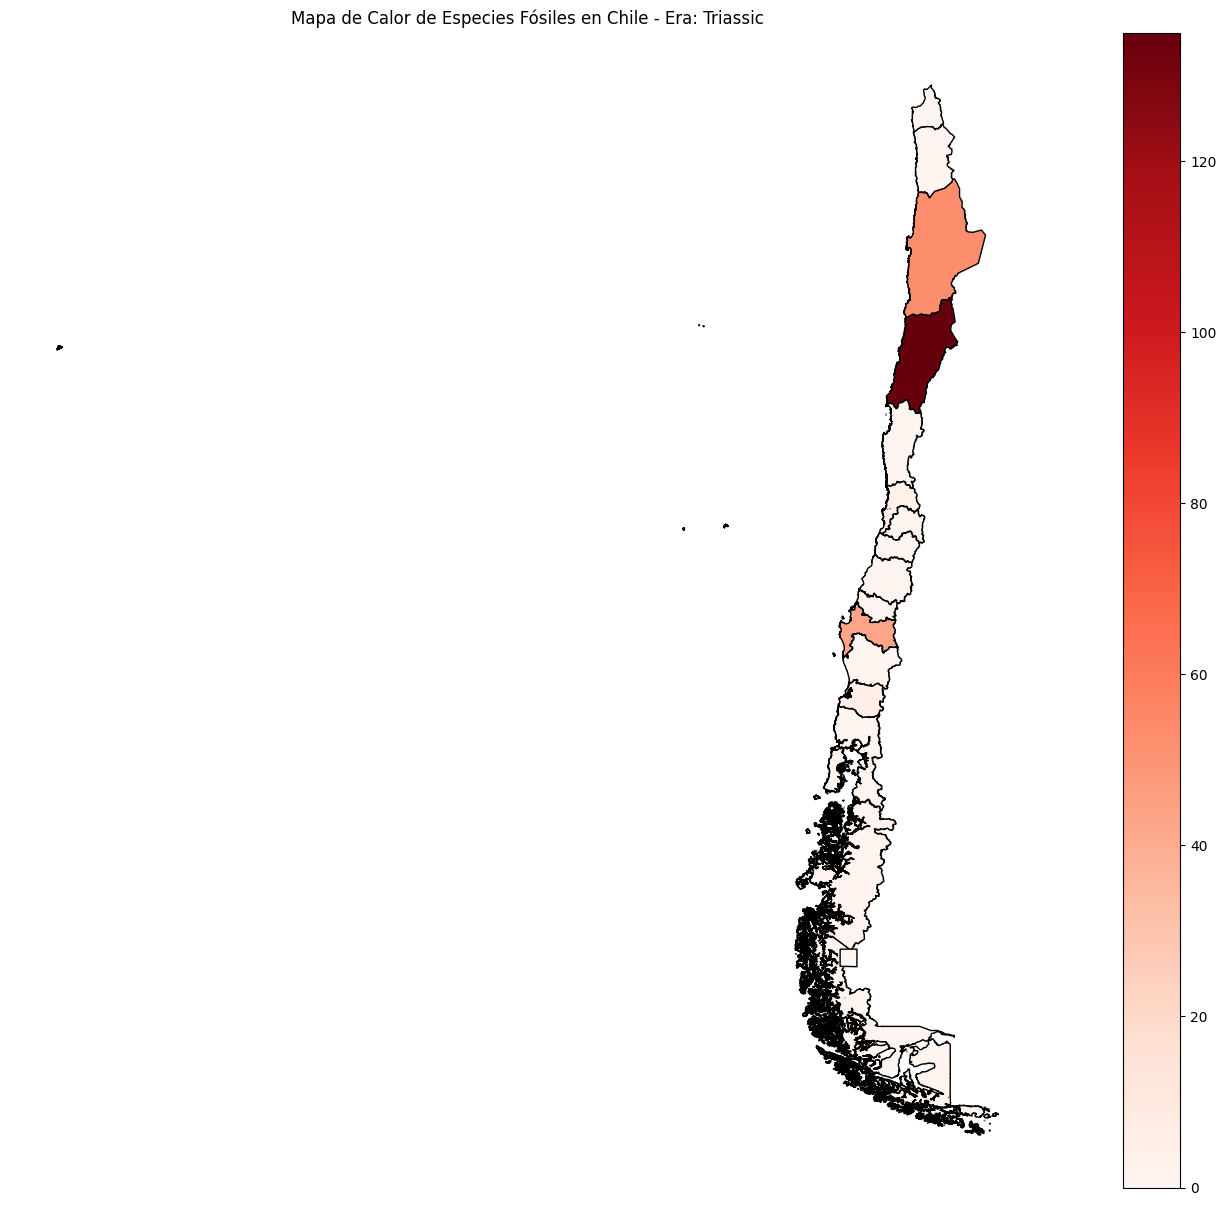

In [14]:
paises = gpd.read_file(shapefile_path).to_crs(4326)

df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby(['region', 'era_early']).agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

paises = paises.rename(columns={'Region': 'region'})

paises['region'] = paises['region'].astype(str)
distribucion['region'] = distribucion['region'].astype(str)

for era in top_5_eras_chile['era_early']:
    distribucion_era = distribucion[distribucion['era_early'] == era]
    
    merged = paises.merge(distribucion_era, on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    print(f"Datos combinados para la era {era}:")
    print(merged[['region', 'total_ocurrencias']])

    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Chile - Era: {era}')
    ax.set_axis_off()

    plt.show()

viendo los mapas de calor que top 5 eras de chile las cuales son (jurasic,neogene,cretaceous,quaternary y triassic)  vemos una tendencia clara en el norte del pais en especial en la Region de Atacama.

Ahora haremos los mapas para las top 5 eras en Argentina

C:\Users\vicen\AppData\Local\Temp\ipykernel_7116\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Paleogene:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén              943.0
2                                            San Luis                0.0
3                                            Santa Fe                0.0
4                                            La Rioja               17.0
5                                           Catamarca               46.0
6                                             Tucumán                8.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz             1084.0
10                                             Chubut             3869.0
11                                            Mendoza              101.0
12         

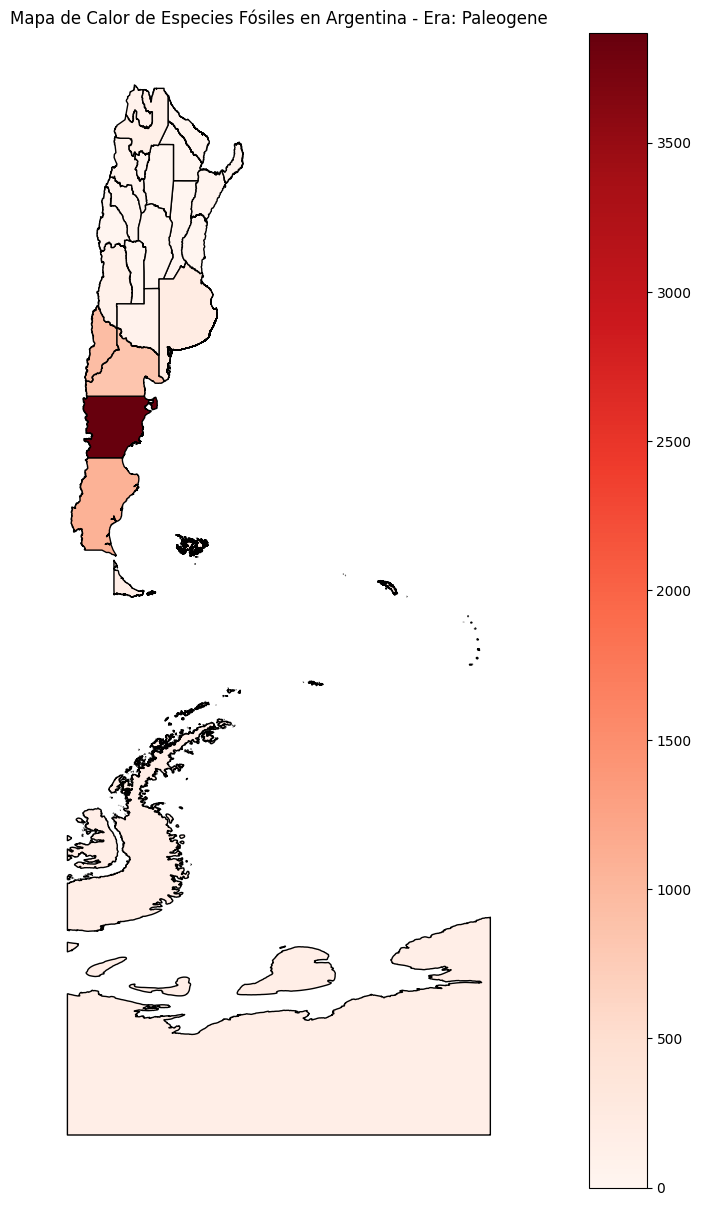

C:\Users\vicen\AppData\Local\Temp\ipykernel_7116\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Cretaceous:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén             1995.0
2                                            San Luis              101.0
3                                            Santa Fe                0.0
4                                            La Rioja               15.0
5                                           Catamarca                0.0
6                                             Tucumán               19.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz             2069.0
10                                             Chubut             1587.0
11                                            Mendoza              465.0
12        

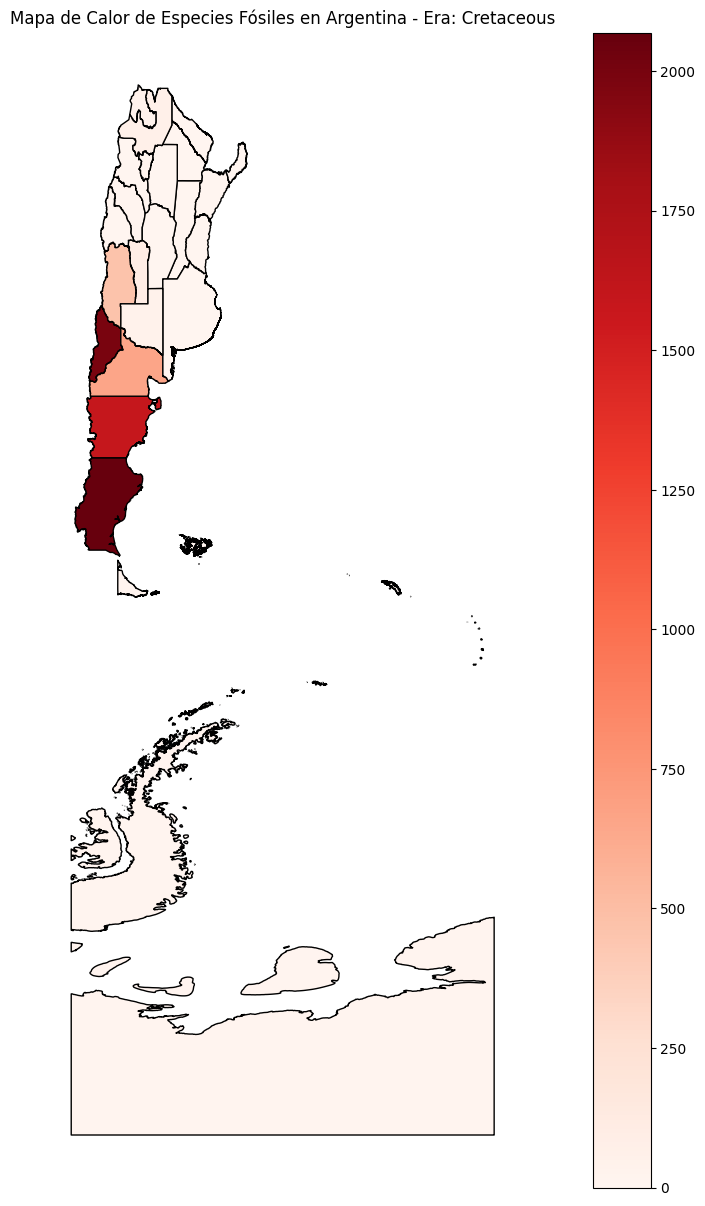

C:\Users\vicen\AppData\Local\Temp\ipykernel_7116\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Neogene:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén              107.0
2                                            San Luis               17.0
3                                            Santa Fe              247.0
4                                            La Rioja               70.0
5                                           Catamarca              364.0
6                                             Tucumán               29.0
7                                               Chaco                4.0
8                                             Formosa                0.0
9                                          Santa Cruz             1752.0
10                                             Chubut              853.0
11                                            Mendoza              123.0
12           

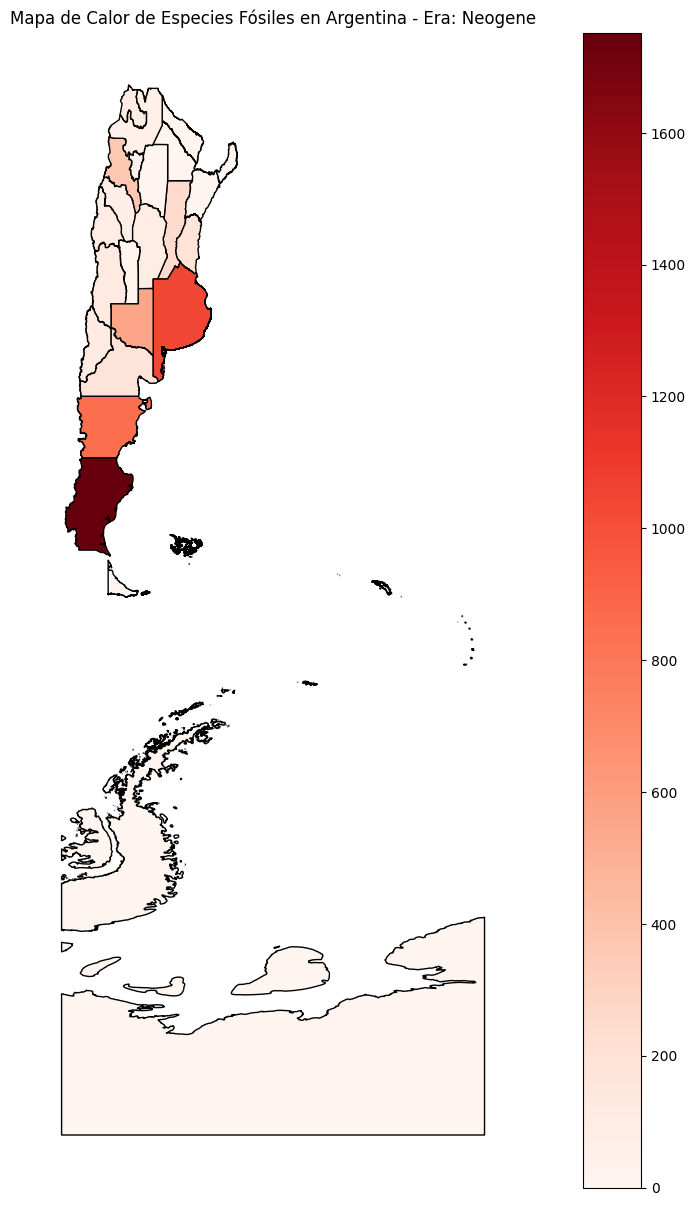

C:\Users\vicen\AppData\Local\Temp\ipykernel_7116\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Ordovician:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén                0.0
2                                            San Luis               12.0
3                                            Santa Fe                0.0
4                                            La Rioja              218.0
5                                           Catamarca               81.0
6                                             Tucumán                0.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz                0.0
10                                             Chubut                0.0
11                                            Mendoza              105.0
12        

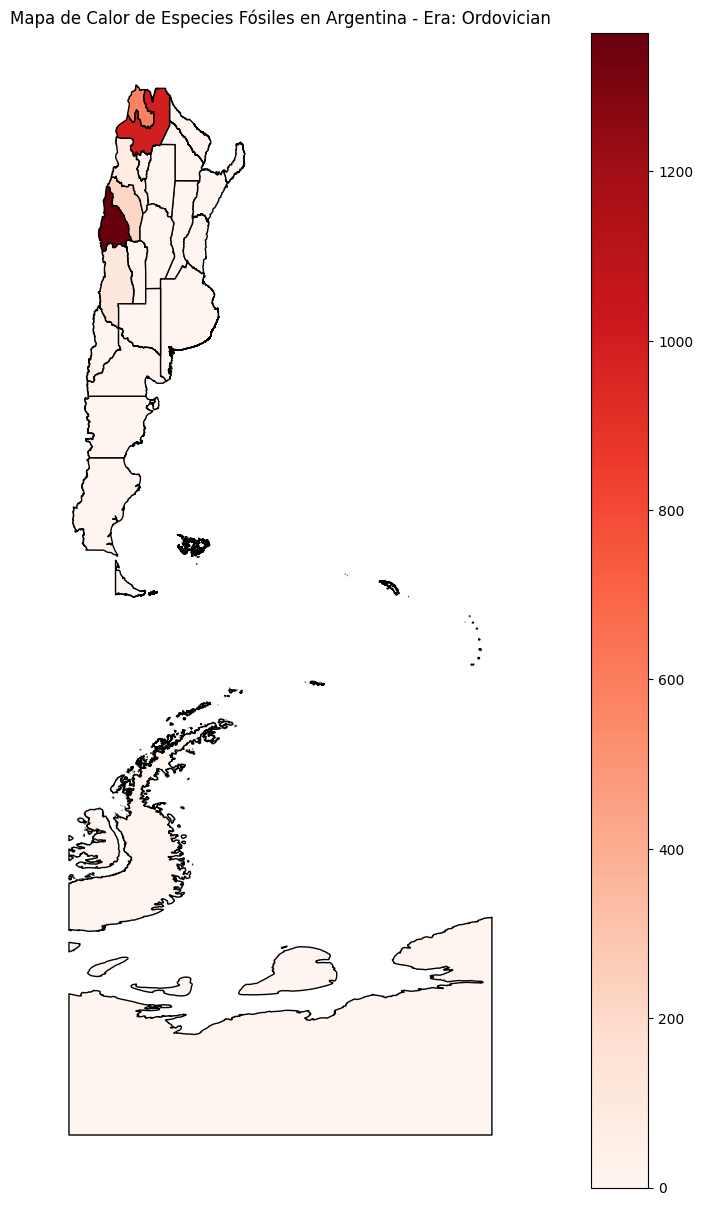

C:\Users\vicen\AppData\Local\Temp\ipykernel_7116\2846094503.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Jurassic:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén             1090.0
2                                            San Luis                0.0
3                                            Santa Fe                0.0
4                                            La Rioja                0.0
5                                           Catamarca                0.0
6                                             Tucumán                0.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz               96.0
10                                             Chubut              220.0
11                                            Mendoza              871.0
12          

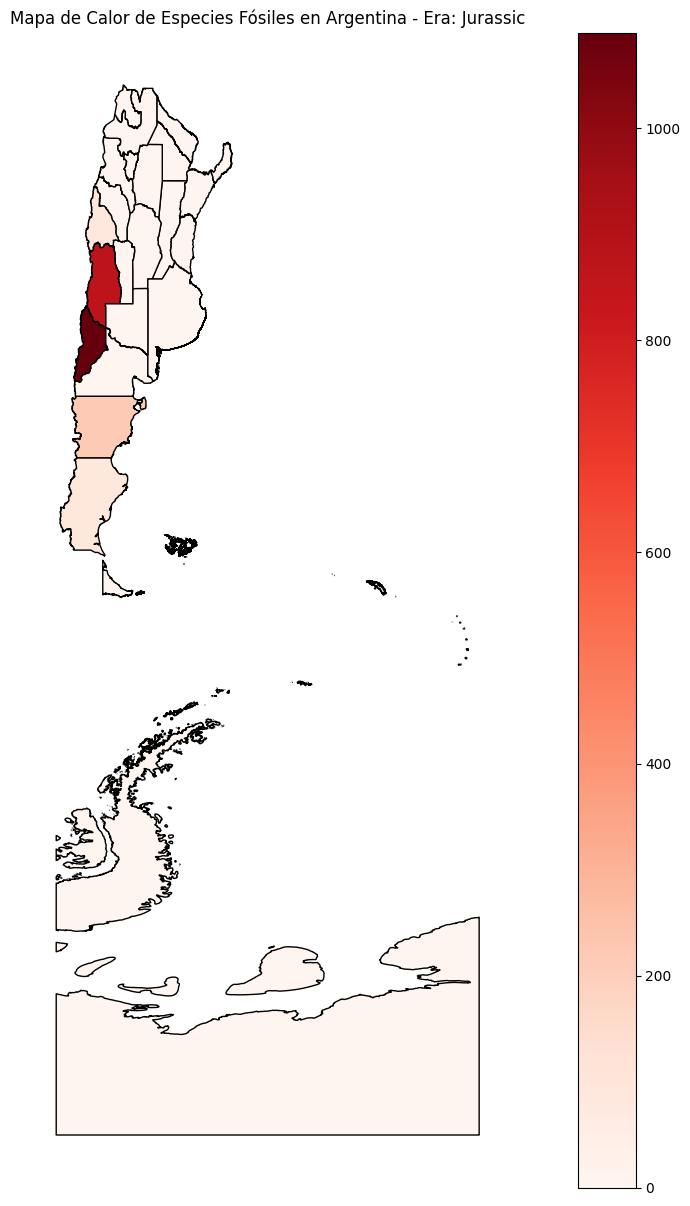

In [15]:
provincias = gpd.read_file(shapefile_path_pro).to_crs(4326)
df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

distribucion = df.groupby(['region', 'era_early']).agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

provincias['nam'] = provincias['nam'].astype(str)

for era in top_5_eras_argentina['era_early']:
    distribucion_era = distribucion[distribucion['era_early'] == era]
    distribucion_era['region'] = distribucion_era['region'].astype(str)

    merged = provincias.merge(distribucion_era, left_on='nam', right_on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    print(f"Datos combinados para la era {era}:")
    print(merged[['nam', 'total_ocurrencias']])

    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Argentina - Era: {era}')
    ax.set_axis_off()

    plt.show()

Y ahora tambien lo haremos con Antartica pero un poco diferente , en este caso lo haremos con un scatter plot.

Eras únicas en el top 5: ['Cretaceous' 'Jurassic' 'Paleogene' 'Cambrian' 'Quaternary']


C:\Users\vicen\AppData\Local\Temp\ipykernel_7116\3684258495.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_eras))


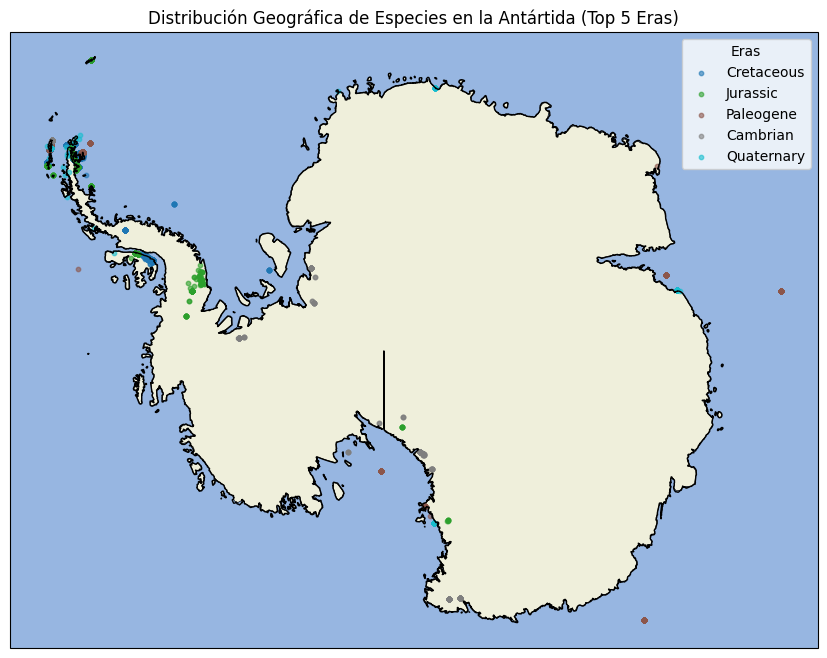

In [16]:
top_5_eras_antartica = ['Cretaceous', 'Paleogene', 'Jurassic', 'Cambrian', 'Quaternary']

antartica_top5 = antartica_df[antartica_df['era_early'].isin(top_5_eras_antartica)]

unique_eras = antartica_top5['era_early'].unique()
print("Eras únicas en el top 5:", unique_eras)

colors = plt.cm.get_cmap('tab10', len(unique_eras))  
era_colors = {era: colors(i) for i, era in enumerate(unique_eras)}

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

for era in unique_eras:
    subset = antartica_top5[antartica_top5['era_early'] == era]
    ax.scatter(subset['lng'], subset['lat'], color=era_colors[era], alpha=0.6, s=10,
               label=era, transform=ccrs.PlateCarree())

plt.legend(title='Eras', loc='upper right')

plt.title('Distribución Geográfica de Especies en la Antártida (Top 5 Eras)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

en la punta es donde se ubica la mayoria de centros cientificos (la mayoria chilenos)

C:\Users\vicen\AppData\Local\Temp\ipykernel_7116\2938244967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Quaternary:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires               12.0
1                                             Neuquén                0.0
2                                            San Luis                3.0
3                                            Santa Fe               88.0
4                                            La Rioja                0.0
5                                           Catamarca               29.0
6                                             Tucumán               39.0
7                                               Chaco               28.0
8                                             Formosa                9.0
9                                          Santa Cruz               30.0
10                                             Chubut               15.0
11                                            Mendoza               42.0
12        

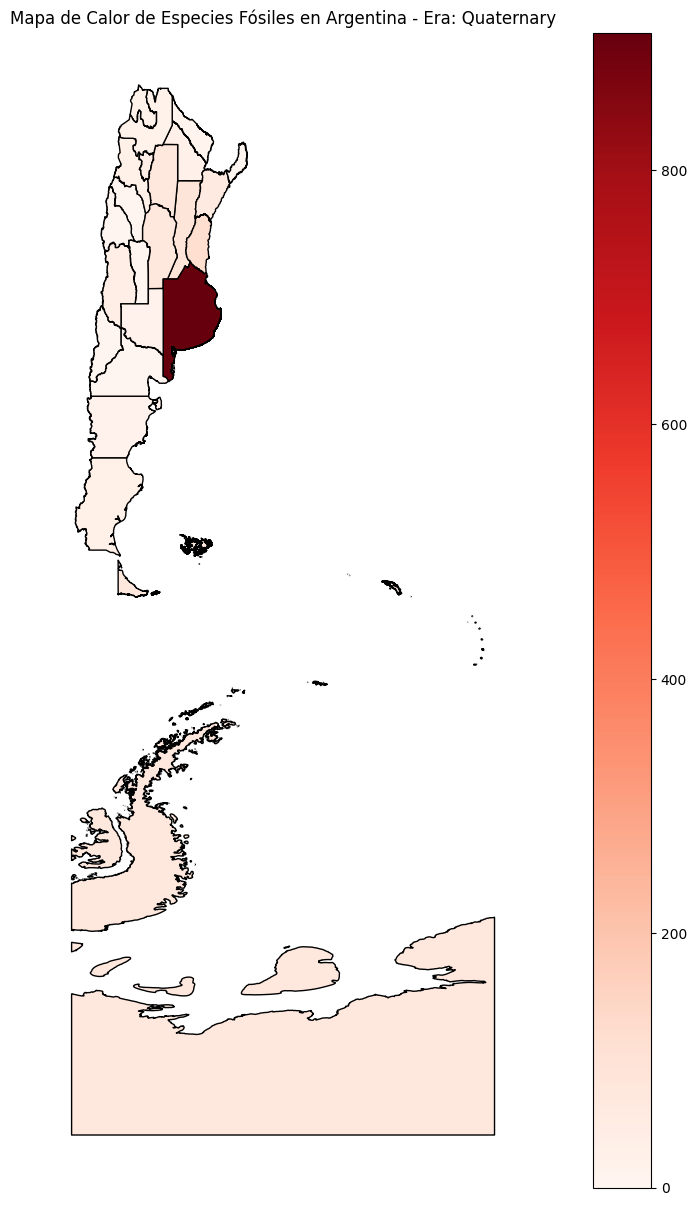

C:\Users\vicen\AppData\Local\Temp\ipykernel_7116\2938244967.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Triassic:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén               59.0
2                                            San Luis                1.0
3                                            Santa Fe                0.0
4                                            La Rioja              193.0
5                                           Catamarca                0.0
6                                             Tucumán                0.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz                9.0
10                                             Chubut                0.0
11                                            Mendoza              342.0
12          

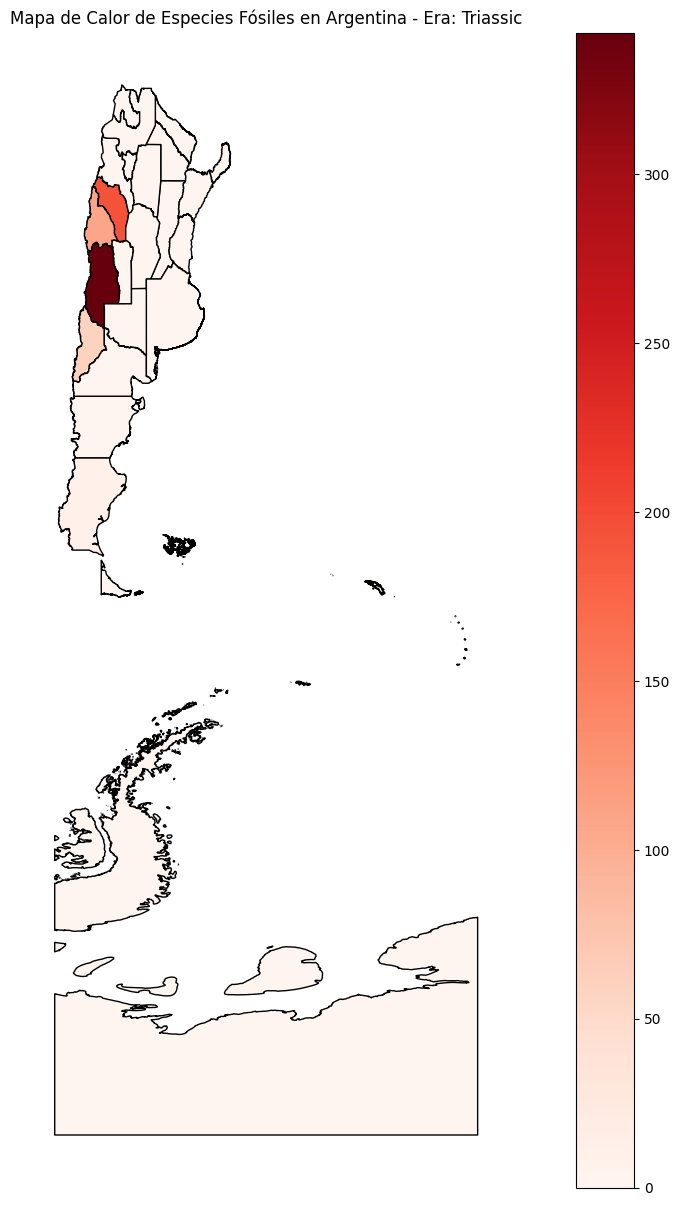

In [24]:
eras = ['Quaternary', 'Triassic']
for era in eras:
    # Filtrar los datos para la era actual
    distribucion_era = distribucion[distribucion['era_early'] == era]
    distribucion_era['region'] = distribucion_era['region'].astype(str)

    # Realizar la fusión con el DataFrame de provincias
    merged = provincias.merge(distribucion_era, left_on='nam', right_on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    print(f"Datos combinados para la era {era}:")
    print(merged[['nam', 'total_ocurrencias']])

    # Crear el mapa
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Argentina - Era: {era}')
    ax.set_axis_off()

    plt.show()

Datos combinados para la era Paleogene:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                0.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta                0.0
3    Región de Magallanes y Antártica Chilena               72.0
4   Región de Aysén del Gral.Ibañez del Campo                0.0
5                           Región de Atacama                4.0
6                          Región de Coquimbo                0.0
7                        Región de Valparaíso                0.0
8            Región Metropolitana de Santiago                0.0
9                         Región de Los Lagos                1.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío                5.0
13                            Región de Ñuble     

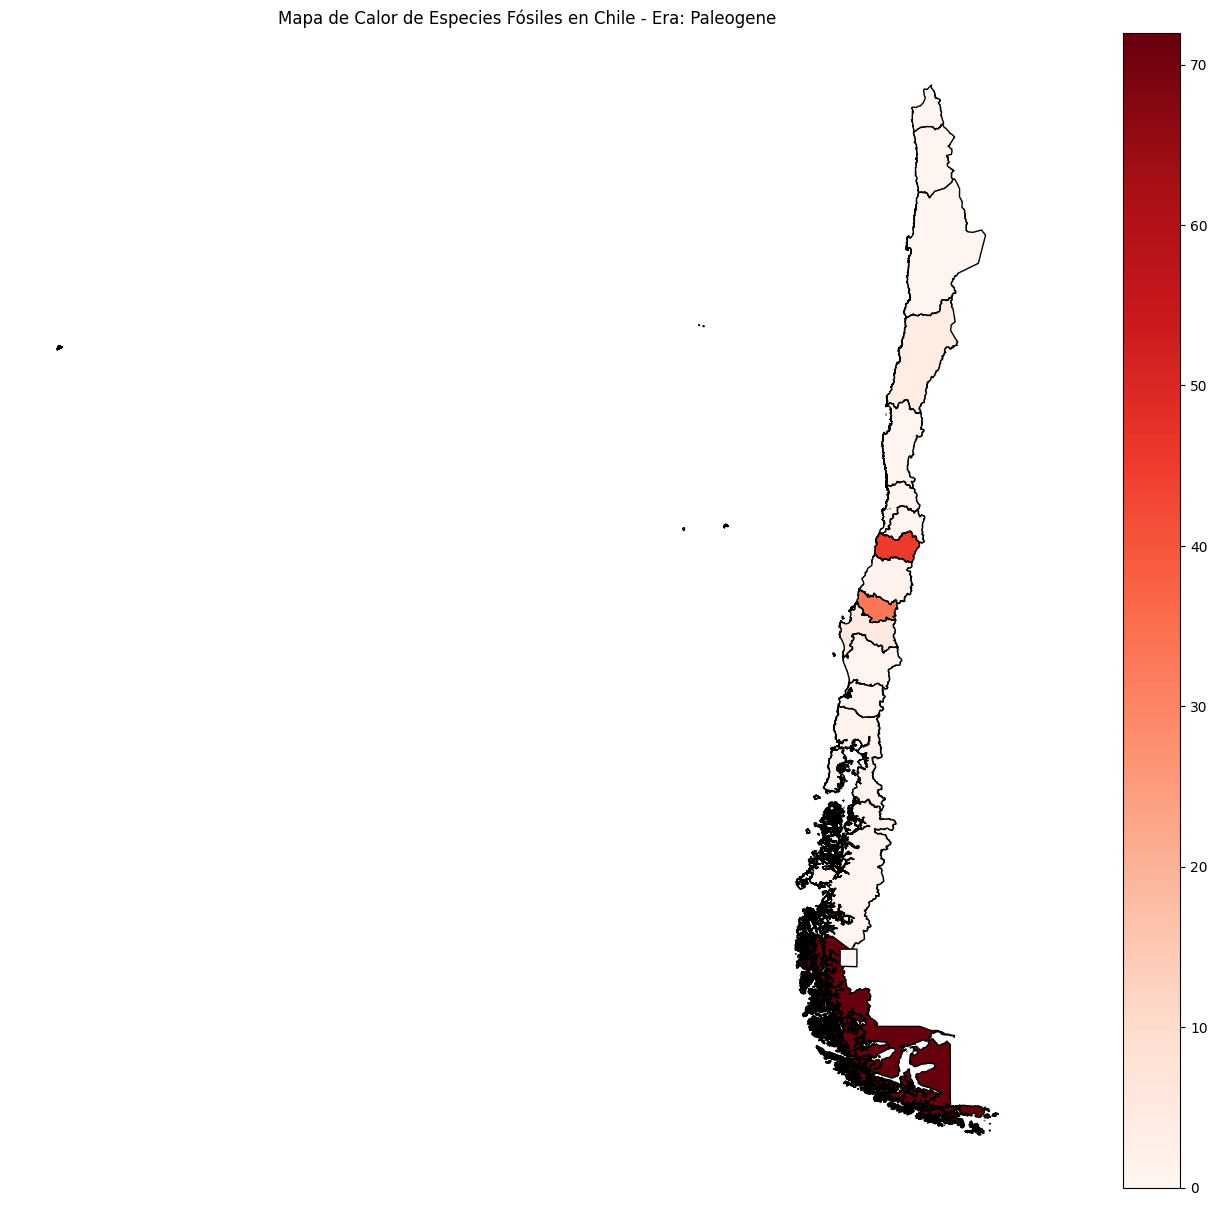

Datos combinados para la era Ordovician:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                0.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta                3.0
3    Región de Magallanes y Antártica Chilena                0.0
4   Región de Aysén del Gral.Ibañez del Campo                0.0
5                           Región de Atacama               26.0
6                          Región de Coquimbo                0.0
7                        Región de Valparaíso                0.0
8            Región Metropolitana de Santiago                0.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío                0.0
13                            Región de Ñuble    

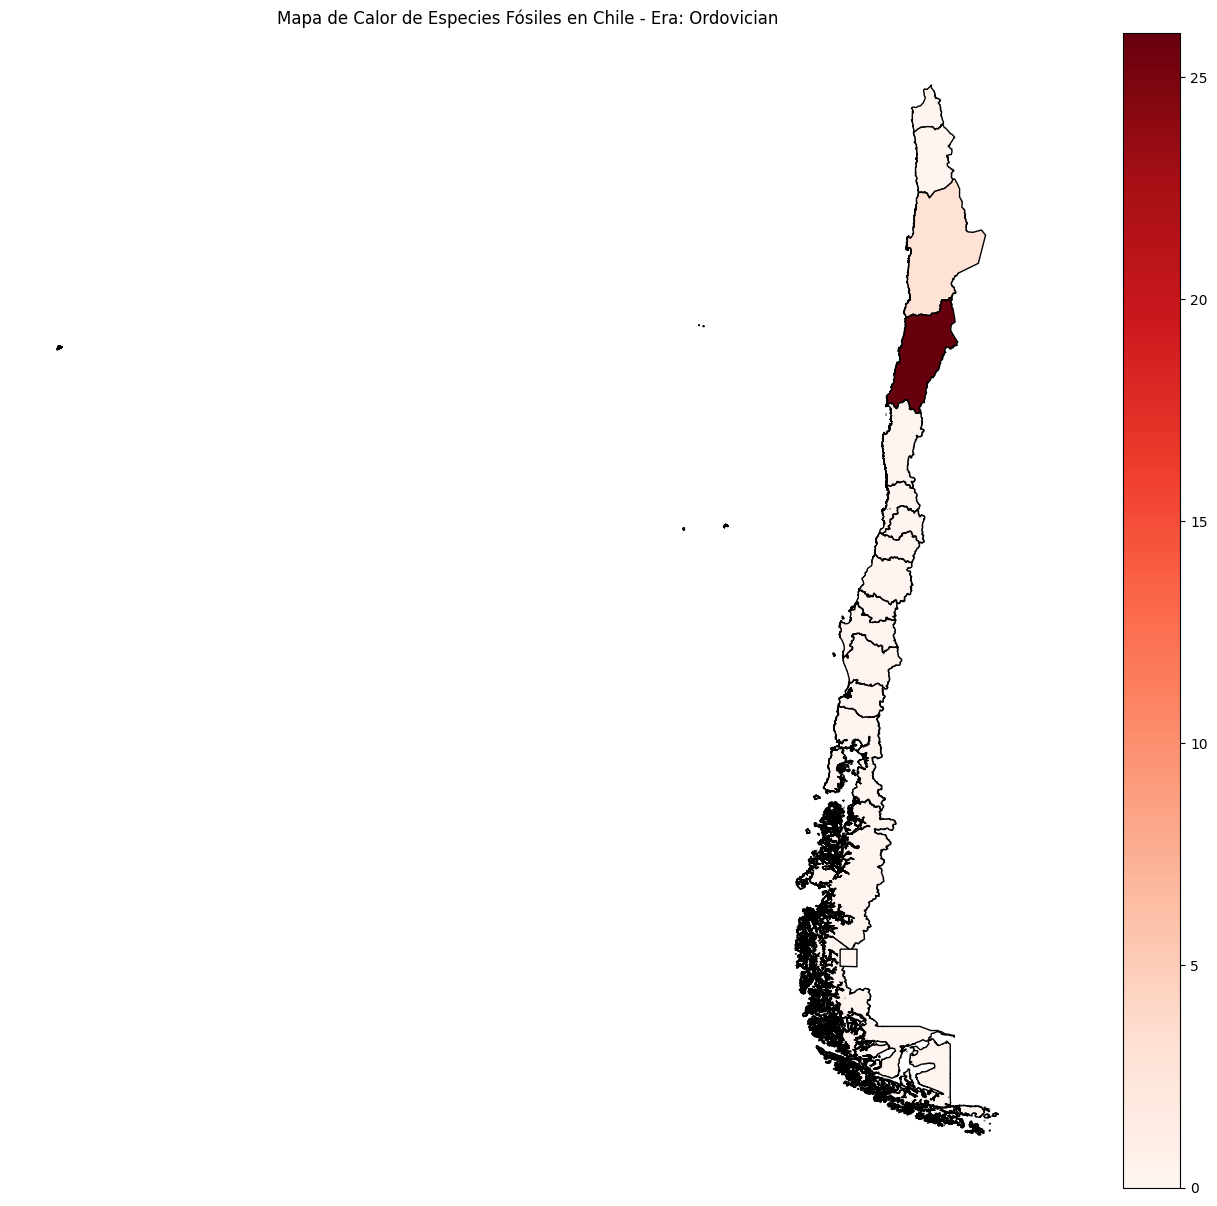

In [25]:

eras = ['Paleogene', 'Ordovician']
for era in eras:
    distribucion_era = distribucion[distribucion['era_early'] == era]
    
    merged = paises.merge(distribucion_era, on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    print(f"Datos combinados para la era {era}:")
    print(merged[['region', 'total_ocurrencias']])

    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Chile - Era: {era}')
    ax.set_axis_off()

    plt.show()

Análisis de la Distribución de Especies Fósiles
1. Jurassic
Chile: Las ocurrencias son variadas, con regiones como Antofagasta y la Región Metropolitana mostrando números significativos (655 y 410, respectivamente).
Argentina: Aquí, Neuquén presenta un número alto de 1090 ocurrencias, lo que sugiere una rica biodiversidad en esta era. Sin embargo, muchas provincias de Argentina reportan cero ocurrencias.
2. Neogene
Chile: La región de Aysén destaca con 487 ocurrencias, pero la distribución es desigual, con algunas regiones mostrando cero fósiles.
Argentina: Santa Cruz y Chubut tienen cifras elevadas (1752 y 853), indicando una concentración de fósiles en el sur del país. Esto podría relacionarse con la geografía y la historia geológica de la provincia.
3. Cretaceous
Chile: La región de Atacama es notable con 4338 ocurrencias, lo que la convierte en un punto caliente para esta era. Otras regiones como Antofagasta y Magallanes también tienen cifras relevantes.
Argentina: Neuquén y Santa Cruz son las más destacadas con 1995 y 2069 ocurrencias. La alta cantidad en estas provincias sugiere condiciones favorables para la preservación de fósiles.
4. Paleogene:
Chile: Región de Magallanes y Antártica Chilena es la región con el mayor número (72)
Argentina: Chubut es la provincia con el mayor número (3869), lo que indica un potencial alto de biodiversidad en el pasado.
5. Ordovician:
Chile: En la Región de Atacama con un total (26) de ocurrencias y lo curioso es que en esta era el total de ocurrencia en todo el pais es 26.
Argentina: La provincia de Salta tiene 995 ocurrencias, lo que sugiere una rica diversidad de fósiles de esta era, mientras que otras regiones presentan escasez.
6. Quaternary:
Chile:Región de Atacama con (251) ocurrencias es la mayor region en esta era
Argentina: Buenos Aires (908) es la provincia con mas ocurrencias y con mucha diferencia con el segundo
7. Triassic:
Chile:Región de Atacama (135) es la region con mas ocurrencias y tambien vemos que solo hay 3 regiones con ocurrencias.
Argentina: Mendoza (342) es la provincia con mas ocurrencias y aca no hay tanta diferencia y vemos que hay una tendecia clara a que las provincias con mas ocurrencias en esta era son las que estan mas cerca de la frontera con Chile.

Conclusiones Generales
Concentración Regional: Tanto en Chile como en Argentina, hay regiones específicas que destacan por su riqueza en fósiles, como Atacama en Chile y Chubut en Argentina. Esto señala la importancia de ciertas áreas geográficas en la preservación de la biodiversidad a lo largo del tiempo.
Desigualdad en la Distribución: Las cifras muestran una gran disparidad en la cantidad de fósiles entre diferentes regiones y entre los dos países, lo que puede reflejar factores como la erosión, la sedimentación, y la actividad tectónica.
Implicaciones Ecológicas: Las altas concentraciones de fósiles en ciertas eras y regiones sugieren que estos ecosistemas eran particularmente favorables para la vida en esos momentos, a menudo debido a condiciones climáticas y geológicas específicas.
Este análisis resalta la complejidad de la evolución de las especies en el tiempo y el espacio, y cómo la geografía actual puede influir en la distribución de fósiles antiguos.